<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/Exercise/stocks-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### https://towardsdatascience.com/3-basic-steps-of-stock-market-analysis-in-python-917787012143

In [1]:
%matplotlib inline

In [2]:
!pip install yfinance

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

In [4]:
# from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import pandas as pd
import talib
import yfinance as yf

In [5]:
plt.rcParams['figure.facecolor'] = 'w'

In [6]:
df = yf.download("TSLA", start="2018-11-01", end="2022-03-03", interval="1d")
df.shape

[*********************100%***********************]  1 of 1 completed


(838, 6)

In [7]:
t = yf.Ticker("T")

t.dividends

Date
1984-03-26    0.116667
1984-06-25    0.116667
1984-09-24    0.116667
1985-01-04    0.116667
1985-04-03    0.125000
                ...   
2021-01-08    0.520000
2021-04-08    0.520000
2021-07-08    0.520000
2021-10-07    0.520000
2022-01-07    0.520000
Name: Dividends, Length: 151, dtype: float64

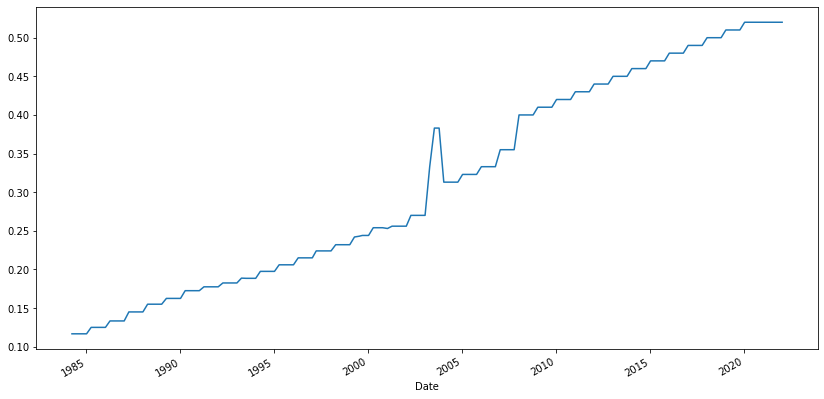

In [8]:
t.dividends.plot(figsize=(14, 7))

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-01,67.652000,69.568001,66.945999,68.856003,68.856003,40000500
2018-11-02,68.748001,69.839996,68.181999,69.281998,69.281998,39040000
2018-11-05,68.099998,68.792000,66.028000,68.279999,68.279999,39155000
2018-11-06,67.814003,69.760002,67.218002,68.211998,68.211998,33814500
2018-11-07,68.667999,70.236000,68.160004,69.632004,69.632004,36872500


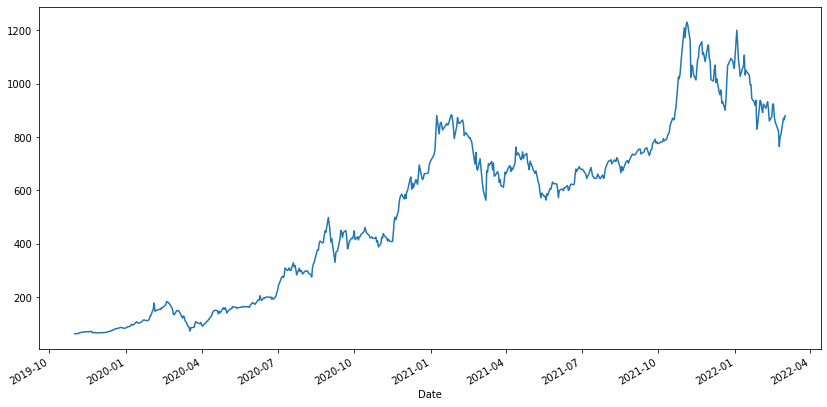

In [10]:
df[df.index >= "2019-11-01"].Close.plot(figsize=(14, 7))

In [14]:
df.loc[:, "rsi"] = talib.RSI(df.Close, 14)

In [15]:
df.loc[:, 'ma20'] = df.Close.rolling(20).mean()
df.loc[:, 'ma200'] = df.Close.rolling(200).mean()

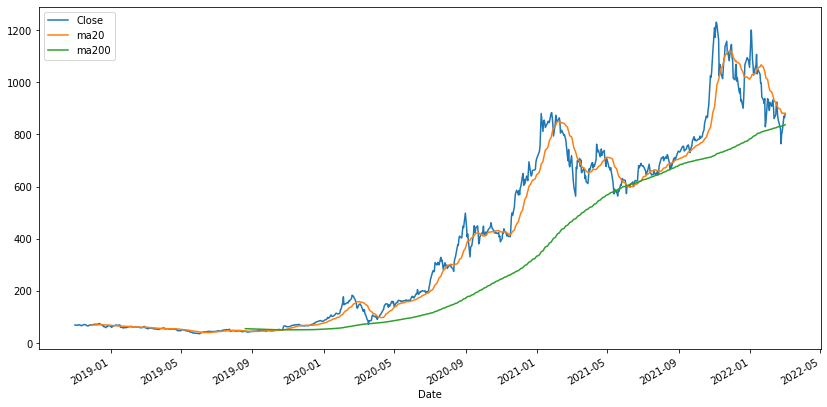

In [16]:
df[["Close", "ma20", "ma200"]].plot(figsize=(14, 7))

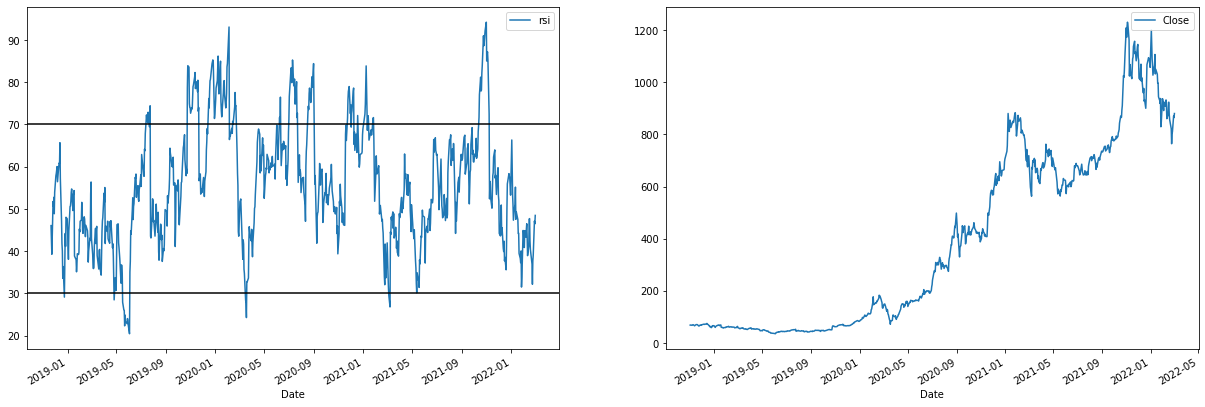

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))


ax0 = df[["rsi"]].plot(ax=ax[0])
ax0.axhline(30, color="black")
ax0.axhline(70, color="black")

df[["Close"]].plot(ax=ax[1])

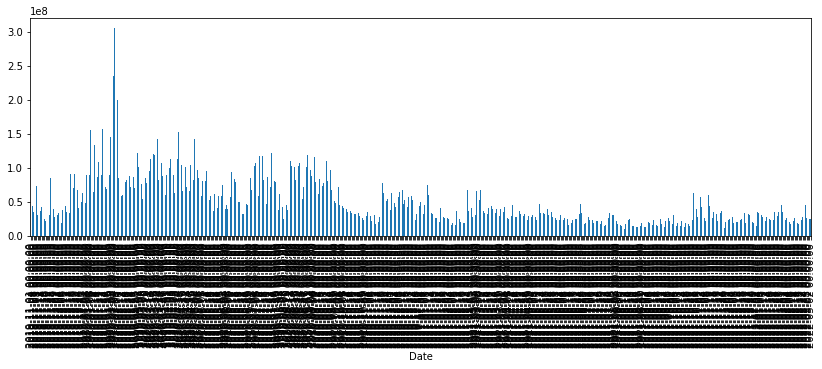

In [18]:
df[df.index >= "2019-11-01"].Volume.plot(kind="bar", figsize=(14, 4))

In [ ]:
df

In [19]:
#import plotly.offline as pyo

# Set notebook mode to work in offline
#pyo.init_notebook_mode()

In [20]:
import plotly.graph_objects as go

fig = go.Figure(
    data=go.Ohlc(
        x=df.index,
        open=df["Open"],
        high=df["High"],
        low=df["Low"],
        close=df["Close"],
    )
)
fig.show()